In [1]:
import numpy as np
import math
import scipy as sci
from scipy import linalg
import matplotlib.pyplot as plt

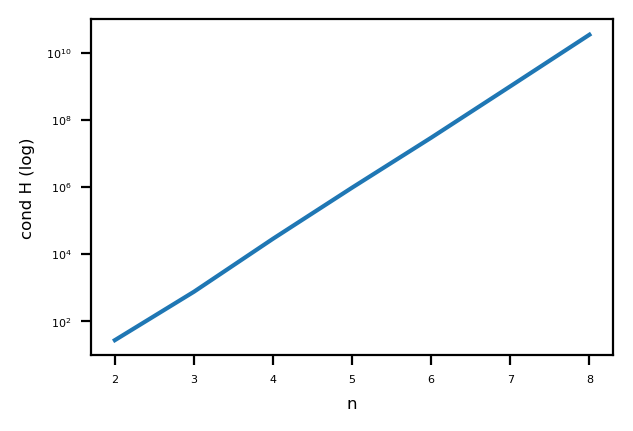

In [3]:
condH=[]
for k in np.arange(7):
    n=k+2
    H=np.zeros((n,n),dtype=float)
    for i in np.arange(n):
        for j in np.arange(n):
            H[i][j]=1/(i+j+1)
    condH.append(linalg.norm(H,ord=np.inf)*linalg.norm(linalg.inv(H),ord=np.inf))
fig,ax=plt.subplots(figsize=(3,2),dpi=200)
ax.plot(np.arange(7)+2,condH,)
ax.set_yscale("log")
ax.set_xlabel("n",size=6)
ax.set_ylabel("cond H (log)",size=6)
plt.tick_params(labelsize=4)
plt.subplots_adjust(left=0.12,right=0.99,bottom=0.15,top=0.99)
fig.savefig("E:/CDEX/ovbb/WaveSimulation/figure/first.png")#"E:/LectureFile2019/numerical analysis/2_3_cond.png")
plt.show()


In [3]:
r=[]
x_=[]
x=[]
deltax=[]
N=6
for k in np.arange(N):
    n=k+8
    H=np.zeros((n,n),dtype=float)
    for i in np.arange(n):
        for j in np.arange(n):
            H[i][j]=1/(i+j+1)
    x.append(np.ones((1,n),dtype=float).T)
    b=H.dot(x[k])
    x_.append(linalg.inv(H).dot(b))
    deltax.append((x[k]-x_[k]))
    r.append(H.dot(deltax[k]))
np.set_printoptions(formatter={'float':"{:.2f}".format},suppress=True)
for i in np.arange(N):
    print("n=",i+8)
    print('r    =',r[i].T)
    print('x~-x =',deltax[i].T)
    print()

n= 8
r    = [[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
x~-x = [[0.00 0.00 0.00 0.00 0.00 0.00 0.00 -0.00]]

n= 9
r    = [[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
x~-x = [[-0.00 0.00 -0.00 -0.00 0.00 0.00 -0.00 0.00 0.00]]

n= 10
r    = [[-0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00]]
x~-x = [[-0.00 0.00 0.00 0.00 0.00 -0.00 0.00 -0.00 0.00 -0.00]]

n= 11
r    = [[-0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00]]
x~-x = [[-0.00 0.00 0.00 0.00 0.00 -0.00 0.00 -0.02 0.00 -0.00 0.00]]

n= 12
r    = [[0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01]]
x~-x = [[0.00 0.00 -0.00 0.00 -0.02 0.03 0.25 -0.25 -0.25 0.25 0.25 -0.02]]

n= 13
r    = [[0.22 0.23 0.23 0.23 0.22 0.22 0.21 0.21 0.20 0.20 0.19 0.18 0.18]]
x~-x = [[-0.00 0.00 0.00 0.02 0.17 0.06 0.62 -5.50 -11.50 11.50 9.25 0.56 0.14]]



In [120]:
#构造方程组矩阵
np.set_printoptions(formatter={'float':"{:.3f}".format},suppress=True)

N=5

Aii=np.zeros((N,N))
for i in np.arange(N):
    if i-1>=0:
        Aii[i][i-1]=-1
    Aii[i][i]=4
    if i+1<=N-1:
        Aii[i][i+1]=-1
        
I=np.identity(N)

A=np.zeros((N**2,N**2))

for i in np.arange(N):
    if i-1>=0:
        A[i*N:(i+1)*N,(i-1)*N:i*N]=-I
    A[i*N:(i+1)*N,i*N:(i+1)*N]=Aii
    if i+1<=N-1:
        A[i*N:(i+1)*N,(i+1)*N:(i+2)*N]=-I

h=1/(N+1)

def f(x,y):
    pi=math.pi
    return 2*(pi**2)*math.sin(pi*x)*math.sin(pi*y)

U=np.zeros((N,N),dtype=float)

F=np.zeros((N,N))
pi=math.pi
for i in np.arange(N):
    for j in np.arange(N):
        x=(i+1)*h
        y=(j+1)*h
        U[i][j]=math.sin(pi*x)*math.sin(pi*y)
        F[i][j]=f(x,y)
        
b=(h**2)*F.reshape(N**2,1)

U=U.reshape((N**2,1))  # U是真实解


def SOR(A,b,u,w):
    n=A.shape[0]
    x=np.zeros((n,1),dtype=float)
    k=0
    delta=[]
    norm=1
    while (k<1000 and norm>1e-6):
        x_=np.array(x)
        for i in np.arange(n):
            x[i]=x[i]+(w/A[i][i])*(b[i]-A[i,:].dot(x))
        norm=linalg.norm((x_-x),ord=np.inf)
        normu=linalg.norm((u-x),ord=np.inf)
        delta.append(normu)
        k=k+1
    return x, delta,k

SORx1,SORdelta1,SORk1=SOR(A,b,U,1)
SORx2,SORdelta2,SORk2=SOR(A,b,U,1.25)
SORx3,SORdelta3,SORk3=SOR(A,b,U,1.5)

def CG(A,b,u):
    n=A.shape[0]
    x=np.ones((n,1))
    deltanorm=[]
    r=b-A.dot(x)
    p=r
    k=0
    normr=1
    pap=1
    normu=1
    while (k<n and normr>1e-8 and pap >1e-8):
        rr=r.T.dot(r)
        pap=((A.dot(p).T).dot(p))
        alpha=rr/pap
        x=x+alpha*p
        r=r-alpha*A.dot(p)
        rrk=r.T.dot(r)
        beta=rrk/rr
        p=r+beta*p
        normr=linalg.norm(r,ord=np.inf)
        normu=linalg.norm(x-u,ord=np.inf)
        deltanorm.append(normu)
        k=k+1
    return x,deltanorm,k

CGx,CGdelta,CGk=CG(A,b,U)

def PCG(A,b,u):
    n=A.shape[0]
    ''''
    w=1.1
    D_=np.diag(np.diag(A)**-0.5)   
    D=np.diag(np.diag(A))
    L=np.tril(A,-1)
    S=(D-w*L).dot(D_)
    M=(w*(2-w))**-0.5*S.dot(S.T)

    '''
    S=np.eye(n,k=0)+np.eye(n,k=1)+np.eye(n,k=-1)
    M=S*A
   # ''''
    x=np.ones((n,1))
    deltanorm=[]
    r=b-A.dot(x)
    z=linalg.solve(M,r)
    p=z
    k=0
    normr=1
    pap=1
    normu=1
    while (k<n and normr>1e-8 and pap >1e-8):
        rz=r.T.dot(z)
        pap=((A.dot(p).T).dot(p))
        alpha=rz/pap
        x=x+alpha*p
        r=r-alpha*A.dot(p)
        z=linalg.solve(M,r)
        rzk=r.T.dot(z)
        beta=rzk/rz
        p=z+beta*p
        normr=linalg.norm(r,ord=np.inf)
        normu=linalg.norm(x-u,ord=np.inf)
        deltanorm.append(normu)
        k=k+1
    return x,deltanorm,k

PCGx,PCGdelta,PCGk=PCG(A,b,U)

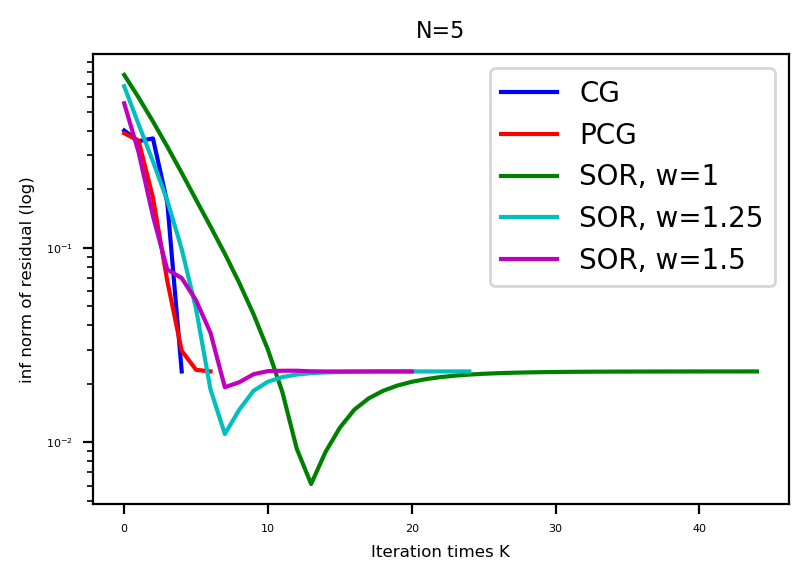

In [121]:
fig,ax=plt.subplots(figsize=(4,3),dpi=200)
ax.plot(CGdelta, label='CG',c='b')
ax.plot(PCGdelta,label='PCG',c='r')

ax.plot(SORdelta1,label='SOR, w=1',c='g')
ax.plot(SORdelta2,label='SOR, w=1.25',c='c')
ax.plot(SORdelta3,label='SOR, w=1.5',c='m')
ax.legend()
ax.set_yscale('log')
ax.set_xlabel("Iteration times K",size=6)
ax.set_ylabel("inf norm of residual (log)",size=6)
ax.set_title('N=5',size=8)
plt.tick_params(labelsize=4)
plt.subplots_adjust(left=0.12,right=0.99,bottom=0.15,top=0.9)
fig.savefig("E:/LectureFile2019/numerical analysis/3_2_norm5.png")
plt.show()

In [74]:
print(PCGdelta[-1],CGdelta[-1],SORdelta1[-1],SORdelta2[-1],SORdelta3[-1])
print(PCGk,CGk,SORk1,SORk2,SORk3)

0.023162918763079965 0.023162918763079965 0.02316560019401992 0.023163489041607255 0.023162973215053118
7 5 43 25 24


In [84]:
print('Aii \n',Aii)
print('-I  \n',-I)
print('f reshape to 5X5 \n',F.reshape(N,N))

Aii 
 [[4.000 -1.000 0.000 0.000 0.000]
 [-1.000 4.000 -1.000 0.000 0.000]
 [0.000 -1.000 4.000 -1.000 0.000]
 [0.000 0.000 -1.000 4.000 -1.000]
 [0.000 0.000 0.000 -1.000 4.000]]
-I  
 [[-1.000 -0.000 -0.000 -0.000 -0.000]
 [-0.000 -1.000 -0.000 -0.000 -0.000]
 [-0.000 -0.000 -1.000 -0.000 -0.000]
 [-0.000 -0.000 -0.000 -1.000 -0.000]
 [-0.000 -0.000 -0.000 -0.000 -1.000]]
f reshape to 5X5 
 [[4.935 8.547 9.870 8.547 4.935]
 [8.547 14.804 17.095 14.804 8.547]
 [9.870 17.095 19.739 17.095 9.870]
 [8.547 14.804 17.095 14.804 8.547]
 [4.935 8.547 9.870 8.547 4.935]]


In [127]:
def Hilbert(n):
    H=np.ones((n,n),dtype=float)
    for i in np.arange(n):
        for j in np.arange(n):
            H[i][j]=1/(i+j+1)
    return H

In [128]:
def J(A,b,u):
    n=A.shape[0]
    xnew=np.zeros((n,1),dtype=float)
    k=0
    delta=[]
    norm=1
    while (k<1000 and norm>1e-6):
        x=np.array(xnew)
        for i in np.arange(n):
            xnew[i]=x[i]+(1/A[i][i])*(b[i]-A[i,:].dot(x))
        norm=linalg.norm((xnew-x),ord=np.inf)
        normu=linalg.norm((u-x),ord=np.inf)
        delta.append(normu)
        k=k+1
    return x, delta,k

In [129]:
n=4
Hil=Hilbert(n)
u=np.ones((n,1))
b=Hil.dot(u)
Jx,Jdelta,Jk=J(Hil,b,u)
Sx1,Sdelta1,Sk1=SOR(Hil,b,u,1)
Sx2,Sdelta2,Sk2=SOR(Hil,b,u,1.25)
Sx3,Sdelta3,Sk3=SOR(Hil,b,u,1.5)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


ValueError: array must not contain infs or NaNs

In [125]:
print('n =',6)
print('J:    ',Jx.T)
print('SOR:   ')
print('w=1   ',Sx1.T)
print('w=1.25',Sx2.T)
print('w=1.5 ',Sx3.T)

n = 6
J:     [[1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  1.000 1.000]]
SOR:   
w=1    [[1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  1.000 1.000]]
w=1.25 [[1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  1.000 1.000]]
w=1.5  [[1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
  1.000 1.000]]


In [126]:
for n in np.arange(6,16,2):
    Hil=Hilbert(n)
    u=np.ones((n,1))
    b=Hil.dot(u)
    Jx,Jdelta,Jk=J(Hil,b,u)
    Sx1,Sdelta1,Sk1=SOR(Hil,b,u,1)
    Sx2,Sdelta2,Sk2=SOR(Hil,b,u,1.25)
    Sx3,Sdelta3,Sk3=SOR(Hil,b,u,1.5)
    
    print('n =',n)
    print('J:    ',Jx.T)
    print('SOR:   ')
    print('w=1   ',Sx1.T)
    print('w=1.25',Sx2.T)
    print('w=1.5 ',Sx3.T)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in multiply
  # Remove the CWD from sys.path while we load stuff.


ValueError: array must not contain infs or NaNs